<a href="https://colab.research.google.com/github/miroa88/knn/blob/main/KNNFeatureEnsamble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import neighbors
from sklearn import datasets
from sklearn import metrics
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
df = pd.read_csv('creditcard.csv')
df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

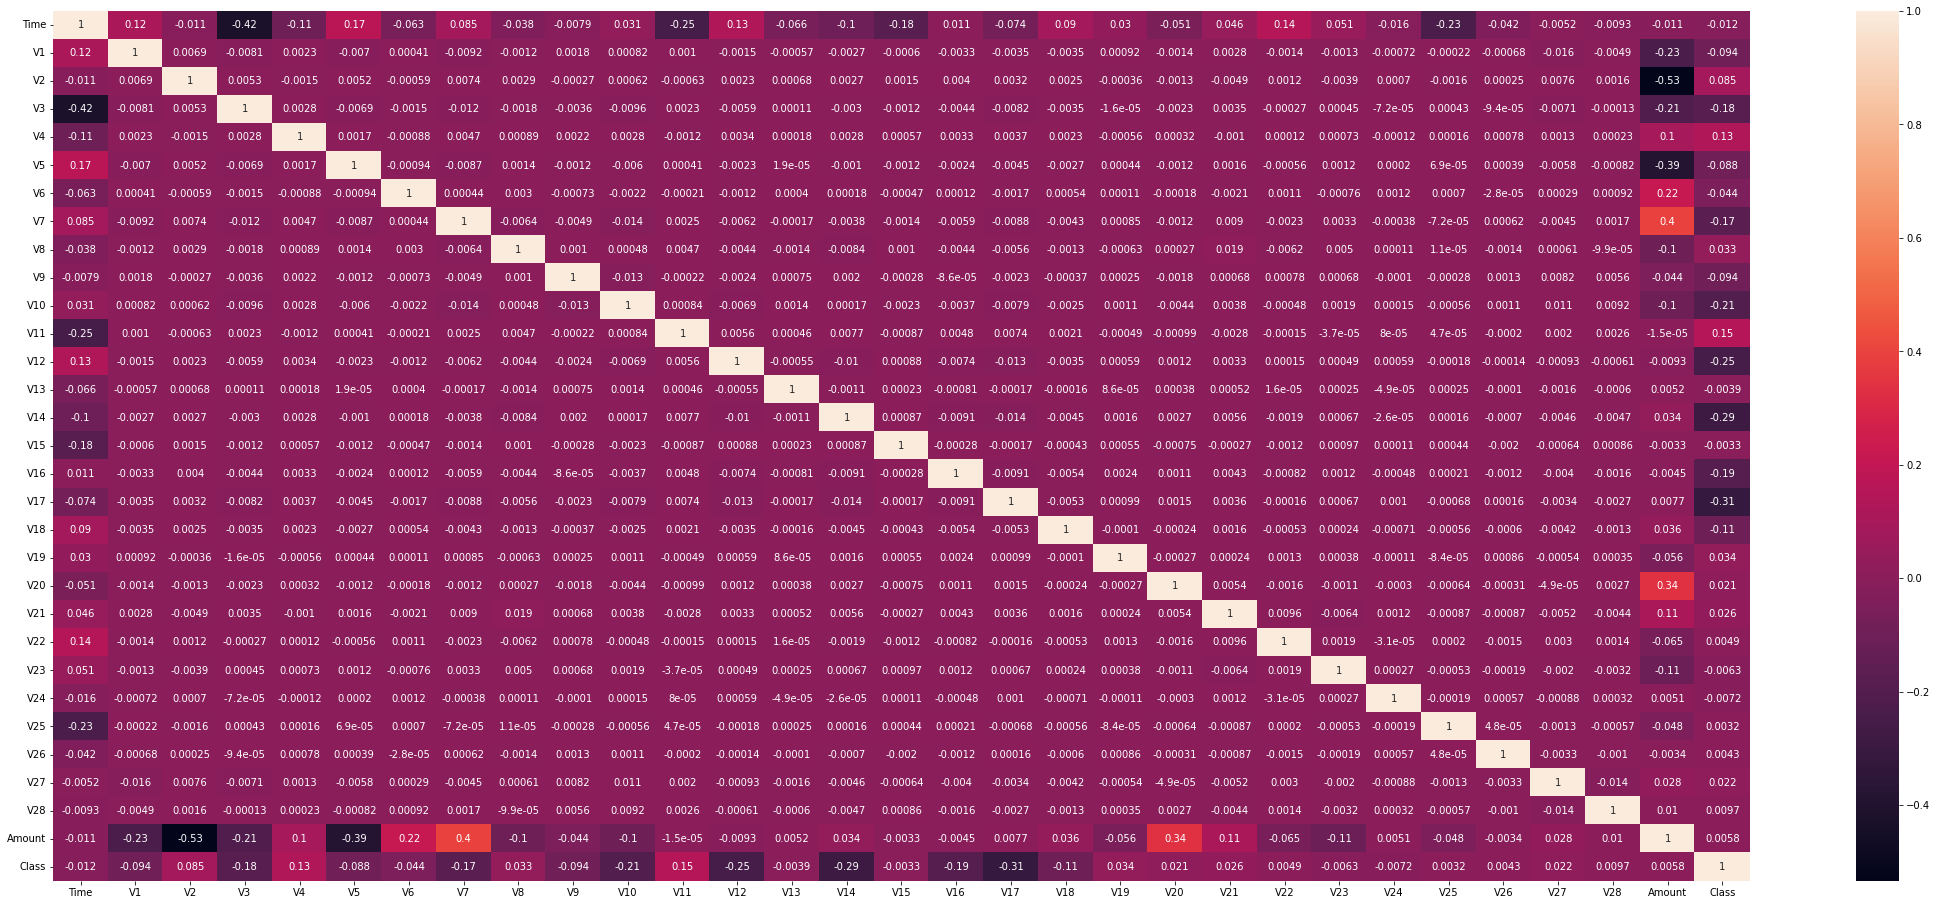

In [ ]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

Feature Selection Least corrolated

In [ ]:
df_noclass=df.drop(columns=['Class'])
coor_map= df_noclass.corr()
coor_map=coor_map.abs()
print(coor_map.columns)
coor_map.info()
corllation={}
num=5
for i in coor_map.columns:
    coor_map.sort_values(by=[i],inplace=True)
    corllation[i] = (coor_map.index.values[:num].tolist())
    corllation[i].append(i)
   
print(corllation)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Time to Amount
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    30 non-null     float64
 1   V1      30 non-null     float64
 2   V2      30 non-null     float64
 3   V3      30 non-null     float64
 4   V4      30 non-null     float64
 5   V5      30 non-null     float64
 6   V6      30 non-null     float64
 7   V7      30 non-null     float64
 8   V8      30 non-null     float64
 9   V9      30 non-null     float64
 10  V10     30 non-null     float64
 11  V11     30 non-null     float64
 12  V12     30 non-null     float64
 13  V13     30 non-null     float64
 14  V14     30 non-null     float64
 15  V15     30 n

Feature Selection Most corrolated

In [ ]:
df_noclass=df.drop(columns=['Class'])
coor_map= df_noclass.corr()
coor_map=coor_map.abs()
print(coor_map.columns)
coor_map.info()
corllation={}
num=5
for i in coor_map.columns:
    coor_map.sort_values(by=[i],inplace=True)
    corllation[i] = (coor_map.index.values[len(coor_map.columns)-num-1:len(coor_map.columns)-1].tolist())
    corllation[i].append(i)
   
print(corllation)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Time to Amount
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    30 non-null     float64
 1   V1      30 non-null     float64
 2   V2      30 non-null     float64
 3   V3      30 non-null     float64
 4   V4      30 non-null     float64
 5   V5      30 non-null     float64
 6   V6      30 non-null     float64
 7   V7      30 non-null     float64
 8   V8      30 non-null     float64
 9   V9      30 non-null     float64
 10  V10     30 non-null     float64
 11  V11     30 non-null     float64
 12  V12     30 non-null     float64
 13  V13     30 non-null     float64
 14  V14     30 non-null     float64
 15  V15     30 n

Results from running the new models with their selected features

In [ ]:
for key in corllation:
    new_df = df[corllation[key]].copy()
    print(key)
    # new_df.info()
    knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
    y = df.Class;
    X = new_df.iloc[:, new_df.columns != 'Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)
    # print(sum(y_test))
    knn.fit(X_train, y_train)
    yhat = knn.predict(X_test)
    print(confusion_matrix(y_test,yhat))

Time
[[56580    71]
 [   93     2]]
V1
[[56602    49]
 [   75    20]]
V2
[[56633    18]
 [   31    64]]
V3
[[56609    42]
 [   48    47]]
V4
[[56610    41]
 [   55    40]]
V5
[[56630    21]
 [   39    56]]
V6
[[56628    23]
 [   19    76]]
V7
[[56597    54]
 [   57    38]]
V8
[[56624    27]
 [   30    65]]
V9
[[56626    25]
 [   24    71]]
V10
[[56624    27]
 [   24    71]]
V11
[[56616    35]
 [   58    37]]
V12
[[56631    20]
 [   39    56]]
V13
[[56597    54]
 [   68    27]]
V14
[[56633    18]
 [   22    73]]
V15
[[56626    25]
 [   27    68]]
V16
[[56622    29]
 [   42    53]]
V17
[[56620    31]
 [   32    63]]
V18
[[56622    29]
 [   54    41]]
V19
[[56628    23]
 [   43    52]]
V20
[[56617    34]
 [   43    52]]
V21
[[56619    32]
 [   55    40]]
V22
[[56630    21]
 [   32    63]]
V23
[[56630    21]
 [   38    57]]
V24
[[56623    28]
 [   28    67]]
V25
[[56623    28]
 [   30    65]]
V26
[[56623    28]
 [   35    60]]
V27
[[56614    37]
 [   62    33]]
V28
[[56628    23]
 [   44  

Creating the ensamble model pulling from each knn

In [ ]:
ensamble_df=pd.DataFrame()
for key in corllation:
    new_df = df[corllation[key]].copy()
    print(key)
    # new_df.info()
    knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
    y = df.Class;
    X = new_df.iloc[:, new_df.columns != 'Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)
    # print(sum(y_test))
    knn.fit(X_train, y_train)
    yhat = knn.predict(X_test)
    mat=confusion_matrix(y_test,yhat)
    if mat[1][1]>mat[1][0]:
        ensamble_df[key]=pd.DataFrame(yhat,columns=[key])
    
    

Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount


Using Pandas to retrieve the results from the ensamble model

In [ ]:

ensamble_df.info()
print(ensamble_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56746 entries, 0 to 56745
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V2      56746 non-null  int64
 1   V5      56746 non-null  int64
 2   V6      56746 non-null  int64
 3   V8      56746 non-null  int64
 4   V9      56746 non-null  int64
 5   V10     56746 non-null  int64
 6   V12     56746 non-null  int64
 7   V14     56746 non-null  int64
 8   V15     56746 non-null  int64
 9   V16     56746 non-null  int64
 10  V17     56746 non-null  int64
 11  V19     56746 non-null  int64
 12  V20     56746 non-null  int64
 13  V22     56746 non-null  int64
 14  V23     56746 non-null  int64
 15  V24     56746 non-null  int64
 16  V25     56746 non-null  int64
 17  V26     56746 non-null  int64
 18  V28     56746 non-null  int64
 19  Amount  56746 non-null  int64
dtypes: int64(20)
memory usage: 8.7 MB
       V2  V5  V6  V8  V9  V10  V12  V14  V15  V16  V17  V19  V20  V22  V23  \
0  

In [ ]:
# ensamble_class=ensamble_df.mode(axis=1)
ensamble_class=ensamble_df.sum(axis=1)

In [ ]:
print(ensamble_class)
ensamble_class_df=pd.DataFrame(ensamble_class,columns=['class'])

0        0
1        0
2        0
3        0
4        0
        ..
56741    0
56742    0
56743    0
56744    0
56745    0
Length: 56746, dtype: int64


In [ ]:
print(ensamble_class_df)
# ensamble_pred=(ensamble_class_df[1] > ensamble_class_df[0]).astype(int)

ensamble_pred=(ensamble_class_df['class'] > 1).astype(int)

       class
0          0
1          0
2          0
3          0
4          0
...      ...
56741      0
56742      0
56743      0
56744      0
56745      0

[56746 rows x 1 columns]


In [ ]:
print(ensamble_pred)

0        0
1        0
2        0
3        0
4        0
        ..
56741    0
56742    0
56743    0
56744    0
56745    0
Name: class, Length: 56746, dtype: int64


Learning that thresshold produces better results than majority

In [ ]:
score=[]
for i in range(len(ensamble_df.columns)):
    acas=[[0,0],[0,0]]
    ensamble_pred=(ensamble_class_df['class'] > i).astype(int)
    for pred,ground in zip(ensamble_pred,y_test):
        acas[ground][pred]+=1
    score.append(((acas[0][0]+acas[1][1])/len(y_test)))
    print(f"{i} : {acas} : {score[i]}")


0 : [[56260, 391], [11, 84]] : 0.9929158002326155
1 : [[56615, 36], [14, 81]] : 0.9991188806259472
2 : [[56637, 14], [14, 81]] : 0.9995065731505305
3 : [[56640, 11], [15, 80]] : 0.9995418179254926
4 : [[56645, 6], [15, 80]] : 0.9996299298628978
5 : [[56646, 5], [16, 79]] : 0.9996299298628978
6 : [[56646, 5], [17, 78]] : 0.9996123074754167
7 : [[56648, 3], [20, 75]] : 0.9995946850879357
8 : [[56648, 3], [23, 72]] : 0.9995418179254926
9 : [[56648, 3], [27, 68]] : 0.9994713283755683
10 : [[56648, 3], [29, 66]] : 0.9994360836006062
11 : [[56648, 3], [33, 62]] : 0.999365594050682
12 : [[56648, 3], [38, 57]] : 0.9992774821132767
13 : [[56648, 3], [41, 54]] : 0.9992246149508336
14 : [[56649, 2], [47, 48]] : 0.9991365030134283
15 : [[56649, 2], [53, 42]] : 0.9990307686885419
16 : [[56651, 0], [55, 40]] : 0.9990307686885419
17 : [[56651, 0], [59, 36]] : 0.9989602791386177
18 : [[56651, 0], [64, 31]] : 0.9988721672012124
19 : [[56651, 0], [77, 18]] : 0.9986430761639586


Full algorithm using grid search to find the best model possible

In [ ]:
import json
coor_map= df_noclass.corr()
df_noclass=df.drop(columns=['Class'])
coor_map=coor_map.abs()
corllation={}
all_max_score=[]
for i in range(1,12):
    for feature in coor_map.columns:
        coor_map.sort_values(by=[feature],inplace=True)
        corllation[feature] = (coor_map.index.values[:i].tolist())
        corllation[feature].append(feature)
    ensamble_df=pd.DataFrame()
    for j in [1,3,5,7]:
        for key in corllation:
            new_df = df[corllation[key]].copy()
            knn = neighbors.KNeighborsClassifier(n_neighbors = j)
            y = df.Class;
            X = new_df.iloc[:, new_df.columns != 'Class']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)
            knn.fit(X_train, y_train)
            yhat = knn.predict(X_test)
            mat=confusion_matrix(y_test,yhat)
            if mat[1][1]>mat[1][0]:
                ensamble_df[key]=pd.DataFrame(yhat,columns=[key])
        ensamble_class=ensamble_df.sum(axis=1)
        ensamble_class_df=pd.DataFrame(ensamble_class,columns=['class'])
        score=[]
        for k in range(len(ensamble_df.columns)):
            acas=[[0,0],[0,0]]
            ensamble_pred=(ensamble_class_df['class'] > k).astype(int)
            for pred,ground in zip(ensamble_pred,y_test):
                acas[ground][pred]+=1
            score.append((k,acas,(acas[0][0]+acas[1][1])/len(y_test)))
        score.sort(reverse=True,key =lambda x : x[1][1][1])
        score.sort(reverse=True,key =lambda x : x[2])
        all_max_score.append([i,j,score[0]])
        print(all_max_score[len(all_max_score)-1])

with open("score.json", "w") as p:
     json.dump(all_max_score, p)

[1, 1, (2, [[56650, 1], [49, 46]], 0.9991188806259472)]
[1, 3, (2, [[56645, 6], [37, 58]], 0.9992422373383146)]
[1, 5, (2, [[56645, 6], [37, 58]], 0.9992422373383146)]
[1, 7, (2, [[56646, 5], [38, 57]], 0.9992422373383146)]
[2, 1, (2, [[56646, 5], [26, 69]], 0.9994537059880872)]
[2, 3, (2, [[56647, 4], [22, 73]], 0.9995418179254926)]
[2, 5, (2, [[56645, 6], [21, 74]], 0.9995241955380115)]
[2, 7, (2, [[56646, 5], [23, 72]], 0.9995065731505305)]
[3, 1, (3, [[56647, 4], [18, 77]], 0.9996123074754167)]
[3, 3, (2, [[56644, 7], [15, 80]], 0.9996123074754167)]
[3, 5, (1, [[56639, 12], [14, 81]], 0.9995418179254926)]
[3, 7, (1, [[56640, 11], [15, 80]], 0.9995418179254926)]
[4, 1, (2, [[56643, 8], [14, 81]], 0.9996123074754167)]
[4, 3, (2, [[56649, 2], [17, 78]], 0.99966517463786)]
[4, 5, (2, [[56647, 4], [17, 78]], 0.9996299298628978)]
[4, 7, (2, [[56647, 4], [17, 78]], 0.9996299298628978)]
[5, 1, (4, [[56645, 6], [15, 80]], 0.9996299298628978)]
[5, 3, (4, [[56648, 3], [15, 80]], 0.99968279702

Second Run to get the rest of 11 knn feature ensamble score

In [ ]:
import json
coor_map= df_noclass.corr()
# for i in range(1,len(coor_map.columns)+1):
df_noclass=df.drop(columns=['Class'])
coor_map=coor_map.abs()
corllation={}
all_max_score=[]
i=11
for feature in coor_map.columns:
    coor_map.sort_values(by=[feature],inplace=True)
    corllation[feature] = (coor_map.index.values[:i].tolist())
    corllation[feature].append(feature)
ensamble_df=pd.DataFrame()
for j in [1,3,5,7]:
    for key in corllation:
        new_df = df[corllation[key]].copy()
        # print(key)
        # new_df.info()
        knn = neighbors.KNeighborsClassifier(n_neighbors = j)
        y = df.Class;
        X = new_df.iloc[:, new_df.columns != 'Class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)
        # print(sum(y_test))
        knn.fit(X_train, y_train)
        yhat = knn.predict(X_test)
        mat=confusion_matrix(y_test,yhat)
        if mat[1][1]>mat[1][0]:
            ensamble_df[key]=pd.DataFrame(yhat,columns=[key])
    ensamble_class=ensamble_df.sum(axis=1)
    ensamble_class_df=pd.DataFrame(ensamble_class,columns=['class'])
    score=[]
    for k in range(21):
        acas=[[0,0],[0,0]]
        ensamble_pred=(ensamble_class_df['class'] > k).astype(int)
        for pred,ground in zip(ensamble_pred,y_test):
            acas[ground][pred]+=1
        score.append((k,acas,(acas[0][0]+acas[1][1])/len(y_test)))
        # print(score[k])
    score.sort(reverse=True,key =lambda x : x[1][1][1])
    score.sort(reverse=True,key =lambda x : x[2])
    all_max_score.append([i,j,score[0]])
    print(all_max_score[len(all_max_score)-1])

with open("score.json", "w") as p:
     json.dump(all_max_score, p)

[11, 1, (5, [[56640, 11], [14, 81]], 0.9995594403129736)]
[11, 3, (4, [[56648, 3], [14, 81]], 0.9997004194128221)]
[11, 5, (2, [[56645, 6], [15, 80]], 0.9996299298628978)]
[11, 7, (2, [[56645, 6], [15, 80]], 0.9996299298628978)]


In [ ]:
score.sort(reverse=True,key =lambda x : x[1][1][1])
score.sort(reverse=True,key =lambda x : x[2])
print(score)

[(4, [[56645, 15], [6, 80]], 0.9996299298628978), (5, [[56646, 16], [5, 79]], 0.9996299298628978), (6, [[56646, 17], [5, 78]], 0.9996123074754167), (7, [[56648, 20], [3, 75]], 0.9995946850879357), (3, [[56640, 15], [11, 80]], 0.9995418179254926), (8, [[56648, 23], [3, 72]], 0.9995418179254926), (2, [[56637, 14], [14, 81]], 0.9995065731505305), (9, [[56648, 27], [3, 68]], 0.9994713283755683), (10, [[56648, 29], [3, 66]], 0.9994360836006062), (11, [[56648, 33], [3, 62]], 0.999365594050682), (12, [[56648, 38], [3, 57]], 0.9992774821132767), (13, [[56648, 41], [3, 54]], 0.9992246149508336), (14, [[56649, 47], [2, 48]], 0.9991365030134283), (1, [[56615, 14], [36, 81]], 0.9991188806259472), (15, [[56649, 53], [2, 42]], 0.9990307686885419), (16, [[56651, 55], [0, 40]], 0.9990307686885419), (17, [[56651, 59], [0, 36]], 0.9989602791386177), (18, [[56651, 64], [0, 31]], 0.9988721672012124), (19, [[56651, 77], [0, 18]], 0.9986430761639586), (20, [[56651, 95], [0, 0]], 0.9983258731892997), (0, [[5